# Polymer Data Processing 
## Importing CSVs and Merge
Data Collected from: 
<ol>
<li>Handbook of Polymer Properties - Tm, Tg, MW</li>
<li>KHANZA - Structure</li>
<li>Polymer Properties Database - Supplemental</li>
</ol>


In [1]:
#Import Packages

import matplotlib.pyplot as plt

import numpy as np  
import os
import glob
from os import chdir
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from os import listdir
from os.path import isfile, join
import csv
import scipy.stats
from mpl_toolkits import mplot3d
from scipy.stats import norm
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras

## Melting Point Data

In [3]:
pwd

'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points'

In [4]:
path = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/TableDataMP'
chdir(path)
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]


In [5]:
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]

print(filenames)

['TableData (14).csv', 'TableData (43).csv', 'TableData (02).csv', 'TableData (38).csv', 'TableData (18).csv', 'TableData (22).csv', 'TableData (34).csv', 'TableData (35).csv', 'TableData (23).csv', 'TableData (19).csv', 'TableData (39).csv', 'TableData (03).csv', 'TableData (42).csv', 'TableData (15).csv', 'TableData (08).csv', 'TableData (24).csv', 'TableData (32).csv', 'TableData (12).csv', 'TableData (45).csv', 'TableData (04).csv', 'TableData (28).csv', 'TableData (29).csv', 'TableData (05).csv', 'TableData (44).csv', 'TableData (13).csv', 'TableData (33).csv', 'TableData (25).csv', 'TableData (09).csv', 'TableData (30).csv', 'TableData (26).csv', 'TableData (06).csv', 'TableData (47).csv', 'TableData (10).csv', 'TableData (11).csv', 'TableData (46).csv', 'TableData (07).csv', 'TableData (27).csv', 'TableData (31).csv', 'TableData (41).csv', 'TableData (16).csv', 'TableData (36).csv', 'TableData (20).csv', 'TableData (21).csv', 'TableData (37).csv', 'TableData (17).csv', 'TableDat

In [7]:
df1 = pd.DataFrame(filenames, columns=['CSV'])
print(df1)

                   CSV
0   TableData (14).csv
1   TableData (43).csv
2   TableData (02).csv
3   TableData (38).csv
4   TableData (18).csv
5   TableData (22).csv
6   TableData (34).csv
7   TableData (35).csv
8   TableData (23).csv
9   TableData (19).csv
10  TableData (39).csv
11  TableData (03).csv
12  TableData (42).csv
13  TableData (15).csv
14  TableData (08).csv
15  TableData (24).csv
16  TableData (32).csv
17  TableData (12).csv
18  TableData (45).csv
19  TableData (04).csv
20  TableData (28).csv
21  TableData (29).csv
22  TableData (05).csv
23  TableData (44).csv
24  TableData (13).csv
25  TableData (33).csv
26  TableData (25).csv
27  TableData (09).csv
28  TableData (30).csv
29  TableData (26).csv
30  TableData (06).csv
31  TableData (47).csv
32  TableData (10).csv
33  TableData (11).csv
34  TableData (46).csv
35  TableData (07).csv
36  TableData (27).csv
37  TableData (31).csv
38  TableData (41).csv
39  TableData (16).csv
40  TableData (36).csv
41  TableData (20).csv
42  TableDa

In [8]:
x = np.shape(df1)
rslt_df = df1.sort_values(by='CSV')
print((x))

(46, 1)


In [9]:
df1 = rslt_df.reset_index()
del df1['index']

In [10]:
pwd

'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/TableDataMP'

In [11]:
df3 = pd.read_csv('TableData (02).csv', sep=';')
df3 = df3.reset_index()
df3.drop(df3.head(4).index,inplace=True)
df3.drop(df3.tail(3).index,inplace=True)
df3.drop(df3.iloc[:,4:], axis=1, inplace=True)
df3.head()
df3 = df3.rename(columns={'level_0':'polymer', 'level_1':'synonyms', 'level_2':'mol.weight', 'level_3':'mp'})
keys = df3.keys()
print(keys)

Index(['polymer', 'synonyms', 'mol.weight', 'mp'], dtype='object')


In [12]:
frames = df3
type(frames)

pandas.core.frame.DataFrame

In [13]:
#combine all files in the list

for i in range(0,46): #iterate through datasets
    #read each file in list
    df2 = pd.read_csv(df1.iloc[i,0], sep=';', dtype={'mp': str})
    #reset index
    df2 = df2.reset_index()
    #drop non-data rows
    df2.drop(df2.head(4).index,inplace=True)
    df2.drop(df2.tail(3).index,inplace=True)
    df2.drop(df2.iloc[:,4:], axis=1, inplace=True)
    #set column names
    df2 = df2.rename(columns={'level_0':'polymer', 'level_1':'synonyms',
                              'level_2':'mol.weight', 'level_3':'mp'})
    #merge datasets into one for better analysis
    frames = [frames, df2]
    frames = pd.concat(frames, axis=0, ignore_index=True)

frames.head()

,polymer,synonyms,mol.weight,mp
0,Poly(2-butenylene hexamethylenediurethane),NaN,256.3,NaN
1,Poly(cis-2-butenylene hexamethylenediurethane),NaN,256.3,136
2,Poly(trans-2-butene sulfide),NaN,256.3,177
3,"Poly(4,4'-butylidenediphenylene carbonate)",NaN,268.31,170
4,"Poly[4,4'-(2,2-butylidene)-diphenylene carbonate]",NaN,268.31,222


# Clean up data

In [14]:
#This defines dataframe

#remove polymer NaN values
df_d = frames.dropna(subset=['mp'])
df_d.head()


#count instances
df_d['mp'].apply(type).value_counts()


<class 'str'>    1829
Name: mp, dtype: int64

In [15]:
#define a clean-up function
def clean_value(x):
    """ If the value is a string, then remove extra symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('~ ', '').replace('>', ''))
    return(x)

In [16]:
#clean up extra symbols with html in mp
df_d = df_d.loc[df_d['mp'] != "htmlentities('"]
#check to see its gone
print(df_d[df_d['mp'].str.contains('html')])

Empty DataFrame
Columns: [polymer, synonyms, mol.weight, mp]
Index: []


In [17]:
df_d[df_d['synonyms'].notnull()]


,polymer,synonyms,mol.weight,mp
441,Poly(cis-1-butoxy-2-methylethylene),(erythro-di-isotactic),114.19,100
442,Poly(trans-1-butoxy-2-methylethylene),(threo-di-isotactic),114.19,100
443,Poly(cis-1-tert-butoxy-2-methylethylene),(erythro-di-isotactic),114.19,> 250
445,Poly(cis-1-ethoxy-2-methylethylene),(erythro-di-isotactic),86.13,191
446,Poly(cis-1-ethoxy-2-methylethylene),(erythro-di-isotactic),86.13,207
447,Poly(trans-1-ethoxy-2-methylethylene),(threo-di-isotactic),86.13,230
448,Poly(trans-1-ethoxy-2-methylethylene),(threo-di-isotactic),86.13,243
450,Poly(cis-1-isopropoxy-2-methylethylene),(erythro-di-isotactic),100.16,204
451,Poly(trans-1-isopropoxy-2-methylethylene),(threo-di-isotactic),100.16,211
452,Poly(cis- or trans-1-methoxy-2-methylethylene),(threo-di-isotactic),72.11,230


In [18]:
#remove extra symbols
df_d['mp'] = df_d['mp'].str.replace('>','').str.replace('D','')
print(df_d['mp'].apply(type).value_counts())
df_d.head()

<class 'str'>    1827
Name: mp, dtype: int64


,polymer,synonyms,mol.weight,mp
1,Poly(cis-2-butenylene hexamethylenediurethane),NaN,256.3,136
2,Poly(trans-2-butene sulfide),NaN,256.3,177
3,"Poly(4,4'-butylidenediphenylene carbonate)",NaN,268.31,170
4,"Poly[4,4'-(2,2-butylidene)-diphenylene carbonate]",NaN,268.31,222
11,Poly(caprylaldehyde),NaN,128.22,35


In [19]:
#convert to numeric
df_d['mp'] = df_d['mp'].astype('float')
df_d['mol.weight'] = df_d['mol.weight'].astype('float')
print(df_d.describe())

        mol.weight           mp
count  1825.000000  1827.000000
mean    309.622917   185.296661
std     119.232722    99.331212
min      42.080000   -40.000000
25%     230.270000   113.000000
50%     302.200000   186.000000
75%     378.620000   248.500000
max    1001.500000   881.000000


In [20]:
#extract values
mw = df_d['mol.weight']
mp = df_d['mp']
print(mw.shape)
print(mp.shape)
type(mw)

(1827,)
(1827,)


pandas.core.series.Series

In [21]:
#range of mp and mol.weight for df_d
print("range of melting points:", df_d['mp'].min(), df_d['mp'].max())
print("range of mol.weight:", df_d['mol.weight'].min(), df_d['mol.weight'].max())


range of melting points: -40.0 881.0
range of mol.weight: 42.08 1001.5


In [22]:
#Remove 50 > mp > 350 

#copy df_d
#df_d = df_d.drop_duplicates(subset=['polymer'])
df_n = df_d
df_n = df_n[df_n['mp'] < 350] 
df_n = df_n[df_n['mp'] > 50] 
#group duplicates and average them
df_n = df_n.groupby('polymer')['mp','mol.weight'].mean().reset_index()
df_n.shape

/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/2795816116.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_n = df_n.groupby('polymer')['mp','mol.weight'].mean().reset_index()


(1413, 3)

In [25]:
#Export progress to csv
df_n.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/Exports/MeltingPointData.csv',index = False, header=True)
df_d.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/Exports/MeltingPointDataRaw.csv',index = False, header=True)

# Glass Transition

In [31]:
#Repeat Process
path1 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/'
chdir(path1)
onlyfiles1 = [f for f in listdir(path1) if isfile(join(path1, f))]

extension = 'csv'
filenames1 = [i for i in glob.glob('*.{}'.format(extension))]

print(filenames1)

['TableData (14).csv', 'TableData (43).csv', 'TableData (02).csv', 'TableData (38).csv', 'TableData (18).csv', 'TableData (22).csv', 'TableData (34).csv', 'TableData (35).csv', 'TableData (23).csv', 'TableData (19).csv', 'TableData (39).csv', 'TableData (03).csv', 'TableData (42).csv', 'TableData (15).csv', 'TableData (08).csv', 'TableData (24).csv', 'TableData (32).csv', 'TableData (12).csv', 'TableData (45).csv', 'TableData (04).csv', 'TableData (28).csv', 'TableData (29).csv', 'TableData (05).csv', 'TableData (44).csv', 'TableData (13).csv', 'TableData (33).csv', 'TableData (25).csv', 'TableData (09).csv', 'TableData (30).csv', 'TableData (26).csv', 'TableData (06).csv', 'TableData (10).csv', 'TableData (11).csv', 'TableData (07).csv', 'TableData (27).csv', 'TableData (31).csv', 'TableData (00).csv', 'TableData (41).csv', 'TableData (16).csv', 'TableData (36).csv', 'TableData (20).csv', 'TableData (21).csv', 'TableData (37).csv', 'TableData (17).csv', 'TableData (40).csv', 'TableDat

In [32]:
df_temp = pd.DataFrame(filenames1, columns=['CSV'])
rslt_df1 = df_temp.sort_values(by='CSV')
df_temp = rslt_df1.reset_index()
del df_temp['index']
print(df_temp)

df3 = pd.read_csv('TableData (00).csv', sep=';')
df3 = df3.reset_index()
df3.drop(df3.head(4).index,inplace=True)
df3.drop(df3.tail(3).index,inplace=True)
df3.drop(df3.iloc[:,4:], axis=1, inplace=True)
df3.head()
df3 = df3.rename(columns={'level_0':'polymer','level_2':'CAS','level_3':'tg'})
keys = df3.keys()
print(keys)

frames = df3

                   CSV
0   TableData (00).csv
1   TableData (01).csv
2   TableData (02).csv
3   TableData (03).csv
4   TableData (04).csv
5   TableData (05).csv
6   TableData (06).csv
7   TableData (07).csv
8   TableData (08).csv
9   TableData (09).csv
10  TableData (10).csv
11  TableData (11).csv
12  TableData (12).csv
13  TableData (13).csv
14  TableData (14).csv
15  TableData (15).csv
16  TableData (16).csv
17  TableData (17).csv
18  TableData (18).csv
19  TableData (19).csv
20  TableData (20).csv
21  TableData (21).csv
22  TableData (22).csv
23  TableData (23).csv
24  TableData (24).csv
25  TableData (25).csv
26  TableData (26).csv
27  TableData (27).csv
28  TableData (28).csv
29  TableData (29).csv
30  TableData (30).csv
31  TableData (31).csv
32  TableData (32).csv
33  TableData (33).csv
34  TableData (34).csv
35  TableData (35).csv
36  TableData (36).csv
37  TableData (37).csv
38  TableData (38).csv
39  TableData (39).csv
40  TableData (40).csv
41  TableData (41).csv
42  TableDa

In [33]:
#combine all files in the list

for i in range(0,45): #iterate through datasets
    #read each file in list
    dft = pd.read_csv(df_temp.iloc[i,0], sep=';', dtype={'tg': str})
    #reset index
    dft = dft.reset_index()
    #drop non-data rows
    dft.drop(dft.head(4).index,inplace=True)
    dft.drop(dft.tail(3).index,inplace=True)
    dft.drop(dft.iloc[:,4:], axis=1, inplace=True)
    #set column names
    dft = dft.rename(columns={'level_0':'polymer','level_2':'CAS','level_3':'tg'})
    #merge datasets into one for better analysis
    frames = [frames, dft]
    frames = pd.concat(frames, axis=0, ignore_index=True)

frames.head()

,polymer,level_1,CAS,tg
0,Poly(acrylic acid),NaN,9003-01-04,106
1,Poly(acrylic acid),NaN,9003-01-04,75
2,Poly(1-adamantyl acrylate),NaN,NaN,153
3,Poly(adamantyl crotonate),NaN,NaN,234
4,Poly(adamantyl sorbate),NaN,NaN,115


In [34]:
#This defines tg dataframe

df_glass = frames.dropna(subset=['tg'])
df_glass = df_glass.drop(['level_1'], axis=1)

#remove weird nonnumerics
df_glass['tg'] = df_glass['tg'].str.replace('~','')
df_glass['tg'] = df_glass['tg'].str.replace('(about)','')
df_glass['tg'] = df_glass['tg'].str.replace('¬±1','')
df_glass['tg'] = df_glass['tg'].str.replace('±1','')
df_glass['tg'] = df_glass['tg'].str.replace("",'')
df_glass.head()
df_glass.shape

/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/3182992389.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_glass['tg'] = df_glass['tg'].str.replace('(about)','')


(2221, 3)

In [35]:
#remove ranges with "to"
this = df_glass[df_glass['tg'].str.contains('to')]
index = this.index
this['tg'] = this['tg'].str[:-6]
this = this['tg'].str.replace('t', '')

#change df_glass to match
df_glass.loc[index,'tg'] = this

#remove html values
df_glass = df_glass.loc[df_glass['tg'] != "htmlentities('"]

print(df_glass[df_glass['tg'].str.contains("htmlent")])
print(df_glass.loc[index,'tg'])

                                                polymer  CAS  \
642                                Poly(4-ethylstyrene)  NaN   
847                    Poly[(trifluoroacetoxy)ethylene]  NaN   
1084  Poly[oxycarbonyloxy-1,3-(2,2,4,4-tetra- methyl...  NaN   

                      tg  
642   27, htmlentities('  
847   46, htmlentities('  
1084  227,htmlentities('  
27       -40 
77       -40 
139        -6
362      -70 
380       -72
406      -85 
446      -51 
450      -38 
459      -65 
530      -67 
833      -20 
836      -15 
864      -90 
1213     -55 
1214     -55 
1215     -30 
1525     -25 
1542    -144 
1965     -83 
1994     -70 
2003     -75 
2255     -20 
2256     -20 
2257     -20 
2263     -20 
Name: tg, dtype: object


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/3488529182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this['tg'] = this['tg'].str[:-6]


In [36]:
df_glass = df_glass.drop([1734])
df_glass = df_glass.drop([1851])
print(df_glass[df_glass['tg'].str.contains('5-')])

                                                polymer         CAS       tg
210                         Poly(N-isopropylacrylamide)  25189-55-3   85-130
286                 Poly(ferrocenylmethyl methacrylate)         NaN  185-195
611                               Poly(4-chlorostyrene)  24991-47-7  115-128
811       Poly(2-ethyl-2-methylpropylene terephthalate)         NaN    55-65
834                Poly[(nonafluorovaleryloxy)ethylene]         NaN    15-20
874               Poly[(heptafluoro-2-propoxy)ethylene]         NaN    55-65
1032                               Poly(acenaphthylene)         NaN  355-376
1162  Polyesters of 3-phenyl-4,4'-biphenyl dicarboxy...         NaN  125-170
1325                     Poly(ether ketone),fluorinated         NaN  155-223
1729  Polyamide of bis(4-carboxyphenyl)phenylphosphe...         NaN  225-254
1731  Poly(N,N'-bis(4'-amino-4-biphenylene isophthal...         NaN  225-235
1737                 Poly(3,4-dibenzyl terephthalamide)         NaN  245-327

In [37]:
#change values with range with "5-"
this2 = df_glass[df_glass['tg'].str.contains('5-')]
index2 = this2.index
this2['tg'] = this2['tg'].str[:-3]
this2 = this2['tg'].str.replace('-','')
df_glass.loc[index2,'tg'] = this2


print(df_glass.loc[index2,'tg'])
print(df_glass[df_glass['tg'].str.contains('5-')])

210      85
286     185
611     115
811      55
834      15
874      55
1032    355
1162    125
1325    155
1729    225
1731    225
1737    245
1857    225
1878    295
1939    235
2020    105
2043    165
2044     95
2087     55
2201     95
2267    125
Name: tg, dtype: object
Empty DataFrame
Columns: [polymer, CAS, tg]
Index: []


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/3945588841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this2['tg'] = this2['tg'].str[:-3]


In [29]:
#change values with range with "0-"
this2 = df_glass[df_glass['tg'].str.contains('0-')]
print(this2)
index2 = this2.index
this2['tg'] = this2['tg'].str[:-3]
this2 = this2['tg'].str.replace('-','')
df_glass.loc[index2,'tg'] = this2
df_glass = df_glass.drop([127])
df_glass = df_glass.drop([365])
df_glass = df_glass.drop([1852])
df_glass = df_glass.drop([1951])


                                                polymer                 tg
127                 Poly(heptafluoro-2-propyl acrylate)         2020-10-05
225           Poly(4-tert-butylcyclohexyl methacrylate)            130-178
365            Poly(3-oxa-5-hydroxypentyl methacrylate)         2020-07-05
754                                       Poly(styrene)            160-190
1075  Poly(oxycarbonyloxy-2-chloro-1,4-phenylene- cy...            170-179
1086  Poly(oxycarbonyloxy-2-methyl-1,4-phenylene- is...  95,100,145,90-110
1203                  Poly(oxyethyleneoxyterephthaloyl)              60-85
1211        Poly(oxyethyleneoxyterephthaloyl) amorphous              60-76
1372              Poly[oxy(2,6-dimethyl-1,4-phenylene)]            210-234
1633                           Poly(aryl ether sulfone)            120-160
1684           Nylon 6 [Poly(imino-1-oxohexamethylene)]              40-87
1718        Nylon 11 [Poly(imino-1-oxoundecamethylene)]              60-70
1720        Nylon 12 [Pol

<ipython-input-29-be3898efac32>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this2['tg'] = this2['tg'].str[:-3]


In [38]:
df_glass['tg'].str.contains('htmlenti')

0       False
1       False
2       False
3       False
4       False
        ...  
2295    False
2296    False
2297    False
2298    False
2299    False
Name: tg, Length: 2206, dtype: bool

In [39]:
#rid of html 
this4 = df_glass[df_glass['tg'].str.contains('htmlenti')]
index4 = this4.index
this4['tg'] = this4['tg'].str[:-14]
this4 = this4['tg'].str.replace(',','')
df_glass.loc[index4,'tg'] = this4

print(df_glass.loc[index4,'tg'])

642     27 
847     46 
1084    227
Name: tg, dtype: object


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/2249479433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this4['tg'] = this4['tg'].str[:-14]


In [40]:
#rid of commas
this3 = df_glass[df_glass['tg'].str.contains(',')]
index3 = this3.index
this3['tg'] = this3['tg'].str[:3]
this3 = this3['tg'].str.replace(',','')
df_glass.loc[index3,'tg'] = this3
print(this3)
print(df_glass.loc[index3,'tg'])
this3.shape
df_glass.loc[2097, 'tg'] = '4'

14      107
64      107
302      55
692      93
765      41
768      37
927     -11
963      84
967     107
973      58
1086     95
1275     25
1277     45
1278     35
1301     17
1304     95
1485    139
1508     58
1514    -58
1519     72
1526     -7
1614    -17
1698     45
1713     60
1717     43
1980    -75
2036     53
2097     4-
Name: tg, dtype: object
14      107
64      107
302      55
692      93
765      41
768      37
927     -11
963      84
967     107
973      58
1086     95
1275     25
1277     45
1278     35
1301     17
1304     95
1485    139
1508     58
1514    -58
1519     72
1526     -7
1614    -17
1698     45
1713     60
1717     43
1980    -75
2036     53
2097     4-
Name: tg, dtype: object


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/2000711785.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this3['tg'] = this3['tg'].str[:3]


In [41]:
df_glass['tg'] = df_glass['tg'].str.replace("(",'').str.replace(")",'')
df_glass['tg'] = df_glass['tg'].str.replace('About','').str.replace('Probably','')


print(df_glass[df_glass['tg'].str.contains(' ')])

                                                polymer         CAS     tg
27                          Poly(4-cyanobutyl acrylate)         NaN   -40 
77                          Poly(4-cyanobutyl acrylate)         NaN   -40 
362                            Poly(octyl methacrylate)         NaN   -70 
406   Poly[(1-heptoxycarbonyl-1- heptoxycarbonylmeth...  28451-56-1   -85 
446                                      Poly(ethylene)   9002-88-4   -51 
450                                Poly(ethyl ethylene)         NaN   -38 
457                                      Poly(1-hexene)  25067-06-5   -58 
459                                 Poly(hexylethylene)         NaN   -65 
530                                      Poly(isoprene)         NaN   -67 
642                                Poly(4-ethylstyrene)         NaN    27 
833            Poly(nonadecafluorodecanoyloxy)ethylene]         NaN   -20 
836           Poly[(pentadecafluorooctanyloxy)ethylene]         NaN   -15 
847                    Po

/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/2381673127.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_glass['tg'] = df_glass['tg'].str.replace("(",'').str.replace(")",'')


In [42]:
#remove those weird spaces taking first value
hey = df_glass[df_glass['tg'].str.contains(' ')]
#hey = df_glass.loc[[202, 592, 665, 668, 863, 867, 873],'tg']
print(hey.shape)
#print(df_glass.loc[[202, 592, 665, 668, 863, 867, 873],'tg'])


(28, 3)


In [43]:
import re

#more editing :/

df_glass.loc[207, 'tg'] = '123'


splitit = df_glass[df_glass['tg'].str.contains('-')]
this3 = splitit[splitit['tg'].str.len()>4]
this3['tg'] = this3['tg'].str[:3]


index3 = this3.index
index3 = [  25,   75,  116,  257,  368,  540,  550,  589,  601,  686,  738,
             970,  985, 1031, 1109, 1205, 1209, 1318, 1637, 1686, 1687,
            1689, 1722, 1727, 1728, 1776, 1845, 1867, 1885, 1887, 1903, 1913,
            1998, 2031, 2047, 2049, 2094, 2095, 2144, 2149, 2156, 2157, 2158,
            2170, 2227, 2229, 2235, 2259, 2297]
this3 = this3.loc[index3]
this3 = this3['tg'].str.replace('-','')
df_glass.loc[index3,'tg'] = this3
print(index3)

[25, 75, 116, 257, 368, 540, 550, 589, 601, 686, 738, 970, 985, 1031, 1109, 1205, 1209, 1318, 1637, 1686, 1687, 1689, 1722, 1727, 1728, 1776, 1845, 1867, 1885, 1887, 1903, 1913, 1998, 2031, 2047, 2049, 2094, 2095, 2144, 2149, 2156, 2157, 2158, 2170, 2227, 2229, 2235, 2259, 2297]


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/980504948.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this3['tg'] = this3['tg'].str[:3]


In [44]:
df_glass[df_glass['tg'].str.contains('±')]
df_glass.loc[817, 'tg'] = '5'

In [45]:
#df_copy[df_copy['tg'].str.contains('\?','')]
print(df_glass[df_glass['tg'].str.contains('/')])
df_glass['tg'] = df_glass['tg'].str.replace('\?','')
df_glass['tg'] = df_glass['tg'].str.replace(' ','')
df_glass['tg'] = df_glass['tg'].str.replace('−', '-')
df_glass['tg'] = df_glass['tg'].str.replace('"', '')
df_glass['tg'] = df_glass['tg'].str.replace('>', '')
df_glass['tg'] = df_glass['tg'].str.replace('<', '')
df_glass.loc[220, 'tg'] = '65'
df_glass.loc[307, 'tg'] = '123'
print(df_glass[df_glass['tg'].str.contains('/')])
df_copy = df_glass

                              polymer  CAS                              tg
220      Poly(adamantyl methacrylate)  NaN  70656370656371/100000000000000
307  Poly(D,L-isobornyl methacrylate)  NaN                     123/101/170
Empty DataFrame
Columns: [polymer, CAS, tg]
Index: []


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_2386/4207522798.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_glass['tg'] = df_glass['tg'].str.replace('\?','')


In [38]:
df_glass.loc[index3,'tg'] = this3
df_glass.loc[index3,'tg']
#convert to float for df_glass

this1 = df_glass[df_glass['tg'].str.len()>4]

index1 = this1.index
this1['tg'] = this1['tg'].str[:3]
this1['tg'] = this1['tg'].str.replace(',', '')
print(this1)
print(index1)
df_glass.loc[index1,'tg'] = this1['tg']

df_glass.head()

<ipython-input-38-41eb176b37d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this1['tg'] = this1['tg'].str[:3]
<ipython-input-38-41eb176b37d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this1['tg'] = this1['tg'].str.replace(',', '')


                                                polymer   tg
1079  Poly(oxycarbonyloxy-2,6-dichloro-1,4-phenylene...  180
1226        Poly(oxyisophthaloyloxy-4,4'-biphenylylene)  164
1842  Poly(iminoterephthaloylimino- 2,4,4-trimethylh...  148
1853  Poly(methylimino-2,2,3,3,4,4-hexafluoro- penta...  193
1863  Poly(oxy-1,4-phenyleneiminoisophthaloylimino- ...  190
2160  Poly(3,3-phthalidylidene-1,4-phenyleneoxycarbo...  240
2217  Poly(3-phenylquinoxaline-2,7-diylcarbonyl-3-ph...  243
2220  Poly(3-phenylquinoxaline-2,7-diyloxy-3-phenylq...  253
2233  Poly(3-phenylquinoxaline-2,7-diyl-3-phenylquin...  288
2237  Poly(3-phenylquinoxaline-2,7-diylsulfonyl-3-ph...  195
2249  Poly(quinoxaline-2,6-diylquinoxaline-6,2-diyl-...  388
Int64Index([1079, 1226, 1842, 1853, 1863, 2160, 2217, 2220, 2233, 2237, 2249], dtype='int64')


,polymer,tg
0,Poly(acrylic acid),106
1,Poly(acrylic acid),75
2,Poly(1-adamantyl acrylate),153
3,Poly(adamantyl crotonate),234
4,Poly(adamantyl sorbate),115


In [53]:
print(df_glass[df_glass['tg'].str.contains(',')])
print(df_glass[df_glass['tg'].str.contains('-')])

Empty DataFrame
Columns: [polymer, CAS, tg]
Index: []
                                              polymer         CAS   tg
8                                Poly(butyl acrylate)   9003-49-0  -54
9                                Poly(butyl acrylate)   9003-49-0  -49
10                           Poly(sec-butyl acrylate)         NaN  -22
11                           Poly(sec-butyl acrylate)         NaN  -20
12                           Poly(sec-butyl acrylate)         NaN  -20
...                                               ...         ...  ...
2285           Poly(ethylene oxide-co-epychloridrine)         NaN  -40
2287                   Poly(ethylene-co-methacrylate)  25103-74-6  -36
2292  Poly(3-hydroxybutyrate-co-4-hydroxybutyrate)-18         NaN   -4
2293  Poly(3-hydroxybutyrate-co-4-hydroxybutyrate)-69         NaN  -36
2294       Poly(β-hydroxybutyrate-co-hydroxyvalerate)         NaN  -16

[548 rows x 3 columns]


In [55]:
df_glass[df_glass['tg'].str.contains('2020-10-05')]
df_glass = df_glass.drop([127])

In [60]:
df_glass[df_glass['tg'].str.contains('130-178')]
df_glass.loc[225,'tg'] = '155'

In [63]:
df_glass[df_glass['tg'].str.contains('2020-07-05')]
df_glass = df_glass.drop([365])

In [67]:
df_glass[df_glass['tg'].str.contains('160-190')]
df_glass.loc[754,'tg'] = '170'

In [70]:
df_glass[df_glass['tg'].str.contains('170-179')]
df_glass.loc[1075,'tg'] = '175'

In [73]:
df_glass[df_glass['tg'].str.contains('60-85')]
df_glass.loc[1203,'tg'] = '70'

In [76]:
df_glass[df_glass['tg'].str.contains('60-76')]
df_glass.loc[1211,'tg'] = '70'

In [79]:
df_glass[df_glass['tg'].str.contains('210-234')]
df_glass.loc[1372,'tg'] = '220'

In [82]:
df_glass[df_glass['tg'].str.contains('120-160')]
df_glass.loc[1633,'tg'] = '140'

In [85]:
df_glass[df_glass['tg'].str.contains('40-87')]
df_glass.loc[1684,'tg'] = '60'

In [88]:
df_glass[df_glass['tg'].str.contains('60-70')]
df_glass.loc[1718,'tg'] = '65'

In [91]:
df_glass[df_glass['tg'].str.contains('40-43')]
df_glass.loc[1720,'tg'] = '40'

In [94]:
df_glass[df_glass['tg'].str.contains('90-133')]
df_glass.loc[1742,'tg'] = '100'

In [98]:
df_glass[df_glass['tg'].str.contains('1930-01-25')]
df_glass = df_glass.drop([1852])
df_glass = df_glass.drop([1853])

In [101]:
df_glass[df_glass['tg'].str.contains('300-320')]
df_glass.loc[1877,'tg'] = '310'

In [104]:
df_glass[df_glass['tg'].str.contains('100-130')]
df_glass.loc[1904,'tg'] = '120'

In [107]:
df_glass[df_glass['tg'].str.contains('260-320')]
df_glass.loc[1916,'tg'] = '290'

In [110]:
df_glass[df_glass['tg'].str.contains('1950-10-01')]
df_glass = df_glass.drop([1951])

In [113]:
df_glass[df_glass['tg'].str.contains('220-290')]
df_glass.loc[2061,'tg'] = '250'

In [116]:
df_glass[df_glass['tg'].str.contains('260-270')]
df_glass.loc[2104,'tg'] = '265'

In [119]:
df_glass[df_glass['tg'].str.contains('190-293')]
df_glass.loc[2179,'tg'] = '200'

In [123]:
df_glass[df_glass['tg'].str.contains('120-122')]
df_glass.loc[2208,'tg'] = '120'

In [126]:
df_glass[df_glass['tg'].str.contains('130-160')]
df_glass.loc[2268,'tg'] = '150'

In [128]:
df_glass = df_glass[df_glass['tg']!='-']

#convert to float
df_copy = df_glass
df_copy = df_copy['tg'].astype('float')
df_copy.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/Exports/TGData08_21.csv',index = False, header=True)
df_copy.describe()

count    2.197000e+03
mean     8.306843e+04
std      3.844940e+06
min     -2.730000e+02
25%      5.000000e+00
50%      7.100000e+01
75%      1.380000e+02
max      1.802202e+08
Name: tg, dtype: float64

In [130]:
df_copy.head()
df_glass.head()

,polymer,CAS,tg
0,Poly(acrylic acid),9003-01-04,106
1,Poly(acrylic acid),9003-01-04,75
2,Poly(1-adamantyl acrylate),NaN,153
3,Poly(adamantyl crotonate),NaN,234
4,Poly(adamantyl sorbate),NaN,115


In [218]:
df_glass['tg'] = df_copy
df_glass.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/Exports/TGData_ALL_08_21.csv',index = False, header=True)
df_copy.describe()
df_glass.head()
df_glass.describe()

,tg
count,24.000000
mean,175.545833
std,63.933954
min,82.000000
25%,139.250000
50%,163.500000
75%,212.250000
max,330.000000


In [132]:
df_glass.head()

,polymer,CAS,tg
0,Poly(acrylic acid),9003-01-04,106.0
1,Poly(acrylic acid),9003-01-04,75.0
2,Poly(1-adamantyl acrylate),NaN,153.0
3,Poly(adamantyl crotonate),NaN,234.0
4,Poly(adamantyl sorbate),NaN,115.0


In [134]:
df_g = df_glass
#clean up float data
#df_g = df_g[df_g['tg'] < 350] 
#df_g = df_g[df_g['tg'] > -100] 
print(df_g.describe())
#group duplicates and average them
#df_g = df_g.groupby('polymer')['tg'].mean().reset_index()
df_g.describe()
df_g[df_g['polymer'].duplicated()]

                 tg
count  2.197000e+03
mean   8.306843e+04
std    3.844940e+06
min   -2.730000e+02
25%    5.000000e+00
50%    7.100000e+01
75%    1.380000e+02
max    1.802202e+08


,polymer,CAS,tg
1,Poly(acrylic acid),9003-01-04,75.0
9,Poly(butyl acrylate),9003-49-0,-49.0
11,Poly(sec-butyl acrylate),NaN,-20.0
12,Poly(sec-butyl acrylate),NaN,-20.0
13,Poly(sec-butyl acrylate),NaN,-23.0
...,...,...,...
2068,Poly(pyromellitic dianhydride) Kapton,NaN,420.0
2185,"Poly(pyrrole),p-toluene sulfonated",NaN,155.0
2221,"Poly(3-phenylquinoxaline-2,7-diyloxy-3-phenylq...",NaN,298.0
2269,"Copolyester, aromatic",NaN,104.0


# Most Important Polymers Properties

In [144]:
mip_keys = mip.keys()
mip.head()

,polymer,polymer type,"molar mass, M (g/mol)","density of amorphous polymer, ρa (g/cm3)","density of crystalline polymer, ρc (g/cm3)","thermal expansivity of a glass, eg (10-4 cm3/(g K))","thermal expansivity of a liquid, el (10-4 cm3/(g K))","specific heat capacity of solid polymer, Csp (J/(g K))","specific heat capacity of liquid polymer, Clp (J/(g K))","molar enthalpy of fusion, ΔHm (kJ/mol)","glass-transition temperature, Tg (K)","crystalline melting point, Tm (K)","solubility parameter, δ ((J/cm3)1/2)","surface tension, γ (mN/m)","index of refraction, n","potential energy constant, ε","thermal conductivity of amorphous polymer, λa (J/(m s K))","thermal conductivity of amorphous polymer, λc (J/(m s K))","unperturbed viscosity coefficient, KΘ (cm3 mol1/2 g&minus3/2)"
0,Poly(2-vinyl pyridine),Polyhalo-olefines,105.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377.0,488.0,NaN,NaN,NaN,NaN,NaN,NaN,0.082
1,Poly(vinyl pyrrolidone),Polyhalo-olefines,111.1,1.25,NaN,NaN,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,1.530,NaN,NaN,NaN,0.074
2,Poly(vinyl carbazole),Polyhalo-olefines,193.2,1.20,0.988,NaN,NaN,NaN,NaN,NaN,491.0,NaN,NaN,NaN,1.683,NaN,0.1405,NaN,0.074
3,Poly(acrylic acid),Polyacrylates,72.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379.0,NaN,NaN,82.0,1.527,NaN,NaN,NaN,0.076
4,Poly(methyl acrylate),Polyacrylates,86.1,1.22,NaN,2.3,5.0,1.34,1.8,NaN,279.0,NaN,19.8,41.0,1.479,5.0,NaN,NaN,0.054


In [147]:
#categories of polymer
types = pd.unique(mip['polymer type'])

# CAS Numbers of Polymers
- Distinct values that can be searched in python chem tools

In [181]:
path2 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/CAS Numbers'
chdir(path2)
onlyfiles = [f for f in listdir(path2) if isfile(join(path2, f))]
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]

print(filenames)

['TableData (02).csv', 'TableData (03).csv', 'TableData (08).csv', 'TableData (04).csv', 'TableData (05).csv', 'TableData (09).csv', 'TableData (06).csv', 'TableData (10).csv', 'TableData (07).csv', 'TableData (00).csv', 'TableData (01).csv']


In [182]:
df1 = pd.DataFrame(filenames, columns=['CSV'])
x = np.shape(df1)
rslt_df = df1.sort_values(by='CSV')
print((x))
#11 by 1

(11, 1)


In [171]:
df1 = rslt_df.reset_index()
del df1['index']

In [183]:
df3 = pd.read_csv('TableData (00).csv', sep=';')
df3 = df3.reset_index()
df3.drop(df3.head(4).index,inplace=True)
df3.drop(df3.tail(3).index,inplace=True)
df3.drop(df3.iloc[:,6:], axis=1, inplace=True)
df3 = df3.rename(columns={'level_0':'name', 'level_1':'synonyms', 'level_2':'CAS', 
                          'level_3':'CA name', 'level_5':'mol.formula'})
keys = df3.keys()
print(keys)
df3.head()

Index(['name', 'synonyms', 'CAS', 'CA name', 'level_4', 'mol.formula'], dtype='object')


,name,synonyms,CAS,CA name,level_4,mol.formula
4,Alginic acid,NaN,9005-32-7,Alginic acid,R,Unk*
5,"Alginic acid, sodium salt",NaN,9005-38-3,"Alginic acid, sodium salt",R,Unk
6,Bayberry wax,Myrtle wax,8038-77-5,"Fats and Glyceridic oils, bayberry",S*,Unk
7,"Beeswax, refined, yellow",NaN,8012-89-3,Beeswax,S*,Unk
8,Boron nitride,NaN,10043-11-5,Boron nitride,R,BN


In [184]:
#combine all files in the list

for i in range(0,11): #iterate through datasets
    #read each file in list
    df4 = pd.read_csv(df1.iloc[i,0], sep=';', dtype={'name': str,'CAS': str, 'synonyms': str, 
                                                     'CA name': str, 'mol.formula': str})
    #reset index
    df4 = df4.reset_index()
    #drop non-data rows
    df4.drop(df4.head(4).index,inplace=True)
    df4.drop(df4.tail(3).index,inplace=True)
    df4.drop(df4.iloc[:,6:], axis=1, inplace=True)
    #set column names
    df4 = df4.rename(columns={'level_0':'name', 'level_1':'synonyms', 'level_2':'CAS', 
                          'level_3':'CA name', 'level_5':'mol.formula'})
    #merge datasets into one for better analysis
    frames = [frames, df4]
    frames = pd.concat(frames, axis=0, ignore_index=True)

frames.tail()

,polymer,level_1,CAS,tg,name,synonyms,CA name,level_4,mol.formula
6575,NaN,NaN,25014-41-9,NaN,Poly(acrylonitrile),Acrylonitrile polymer; poly(1-cyanoethylene),"2-Propenenitrile, homopolymer",R,(C3H3N)
6576,NaN,NaN,9003-18-3,NaN,Poly(acrylonitrile-co-butadiene),Acrylonitrile-butadiene polymer,"2-Propenenitrile, polymer with 1,3-butadiene",R,(C4H6·C3H3N)
6577,NaN,NaN,68683-29-4,NaN,"Poly(acrylonitrile-co-butadiene), amine termin...",NaN,"2-Propenenitrile, polymer with 1,3-butadiene, ...",R,(C4H6·C3H3N)
6578,NaN,NaN,88254-10-8,NaN,"Poly(acrylonitrile-co-butadiene), hydrogenated",NaN,"2-Propenenitrile, polymer with 1,3-butadiene, ...",*,(C4H6·C3H3N)
6579,NaN,NaN,68891-50-9,NaN,Poly(acrylonitrile-co-butadiene- co-acrylic ac...,NaN,"2-Propenoic acid, polymer with 1,3-butadiene a...",*,(C4H6· C3H4O2· C3H3N)


In [185]:
frames.shape

#6580x9

(6580, 9)

In [186]:
#This defines tg dataframe CAS

df_cas = frames.dropna(subset=['CAS'])
#drop nan CAS
df_cas = df_cas.drop(['level_1'], axis=1)
df_cas = df_cas.drop(['level_4'], axis=1)

In [190]:
df_cas['CAS'].apply(type).value_counts()

<class 'str'>    4532
Name: CAS, dtype: int64

In [191]:
#export to csv

df_cas.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/CAS Numbers/CASCompiled_08_21.csv',index = False, header=True)




# Enthalpy of Melting

In [206]:
path3 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Ethalpy of Melting'
chdir(path3)
onlyfiles = [f for f in listdir(path3) if isfile(join(path3, f))]
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]

print(filenames)

['TableData (2).csv', 'TableData (1).csv', 'TableData (0).csv']


In [207]:
dfe = pd.DataFrame(filenames, columns=['CSV'])
x = np.shape(dfe)
rslt_df = dfe.sort_values(by='CSV')
print((x))
#3 by 1

(3, 1)


In [209]:
dfe = rslt_df.reset_index()
del dfe['index']

df3 = pd.read_csv('TableData (0).csv', sep=';')
df3 = df3.reset_index()
df3.drop(df3.head(4).index,inplace=True)
df3.drop(df3.tail(3).index,inplace=True)
df3.drop(df3.iloc[:,4:], axis=1, inplace=True)
df3 = df3.rename(columns={'level_0':'polymer', 'level_1':'mw', 'level_2':'ΔH0 (J/g)', 
                          'level_3':'ΔH0 (kJ/mol)'})
keys = df3.keys()
print(keys)
df3.head()

Index(['polymer', 'mw', 'ΔH0 (J/g)', 'ΔH0 (kJ/mol)'], dtype='object')


,polymer,mw,ΔH0 (J/g),ΔH0 (kJ/mol)
4,Polyamide 6,113.2,213,24.1
5,"Polyamide 6,6",226.3,256,57.9
6,"Polyamide 6,10",282.4,212,60
7,Polyamide 11,183.3,224,41
8,Polyamide 12,197.3,245,48.3


In [211]:
df_enth = df3
df_enth['ΔH0 (J/g)'] = df_enth['ΔH0 (J/g)'].astype('float')
df_enth['ΔH0 (J/g)'] = df_enth['ΔH0 (kJ/mol)'].astype('float')
df_enth['mw'] = df_enth['ΔH0 (kJ/mol)'].astype('float')
df_enth.head()

,polymer,mw,ΔH0 (J/g),ΔH0 (kJ/mol)
4,Polyamide 6,24.1,24.1,24.1
5,"Polyamide 6,6",57.9,57.9,57.9
6,"Polyamide 6,10",60.0,60.0,60
7,Polyamide 11,41.0,41.0,41
8,Polyamide 12,48.3,48.3,48.3


In [212]:
#export to csv

df_enth.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Ethalpy of Melting/EnthalpyofMelting_Compiled_08_21.csv',index = False, header=True)


In [ ]:
from urllib.request import urlopen

def CIRconvert(ids):
    try:
        url = 'https://cactus.nci.nih.gov/chemical/structure' + ids + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['3-Methylheptane', 'Aspirin', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2']

for ids in identifiers :
    print(ids, CIRconvert(ids))

## Data Visualization

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm
from scipy.stats import mode
import seaborn as sns
from seaborn import scatterplot
sns.set()
%matplotlib inline

In [4]:
path = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/Exports'
chdir(path)
df_mp = pd.read_csv('MeltingPointData.csv')
path1 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Melting Points/Exports'
chdir(path1)
df_glass = pd.read_csv('TGData_ALL_08_21.csv')
path2 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Most Important Polymers'
chdir(path2)
df_mip = pd.read_excel('MIP.xlsx')
path3 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/CAS Numbers'
chdir(path3)
df_cas = pd.read_csv('CASCompiled_08_21.csv')
path4 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/Ethalpy of Melting'
chdir(path4)
df_enth = pd.read_csv('EnthalpyofMelting_Compiled_08_21.csv')
path5 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Monomer Properties'
chdir(path5)
df_mon = pd.read_csv('MonomerCompiled_08_21.csv')


In [5]:
#AM Polymer Import
path6 = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/'
chdir(path6)
df_AM = pd.read_excel('polymerAM.xlsx')

# Convert Polymer Names to SMILES

In [ ]:
import cirpy

In [ ]:
import chemschematicresolver as csr
from skimage import io
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300

# Names of Dataframes
- df_mp
- df_glass
- df_mip
- df_cas
- df_enth
- df_mon
- df_AM

In [6]:
print(df_mip.keys())

Index(['polymer', 'category', 'mw', 'density of amorphous (g/cm3)',
       'density of crystal (g/cm3)', 'thermal expansion glass',
       'thermal expansion liquid', 'specific heat solid ',
       'specific heat liquid polymer',
       'molar enthalpy of fusion, ΔHm (kJ/mol)', ' tg', 'mp',
       'solubility  ((J/cm3)1/2)', 'surface tension (mN/m)',
       'index of refraction, n', 'potential energy constant, ε',
       'thermal conductivity of amorphous polymer, λa (J/(m s K))',
       'thermal conductivity of amorphous polymer, λc (J/(m s K))',
       'unperturbed viscosity coefficient'],
      dtype='object')


In [7]:
print(df_mp.keys())
print(df_glass.keys())
print(df_cas.keys())
print(df_enth.keys())
print(df_mon.keys())
print(df_AM.keys())

Index(['polymer', 'mp', 'mw'], dtype='object')
Index(['polymer', 'CAS', 'tg'], dtype='object')
Index(['polymer', 'CAS', 'tg', 'name', 'synonyms', 'CA name', 'mol.formula'], dtype='object')
Index(['polymer', 'mw', 'ΔH0 (J/g)', 'ΔH0 (kJ/mol)'], dtype='object')
Index(['category', 'name', 'structure', 'CAS', 'mw', 'mp', 'density'], dtype='object')
Index(['synonym', 'polymer', 'class', 'CID', 'CAS Number', 'SMILES', 'mp',
       'tg', 'density', 'Structure-based name', 'Other name', 'Link'],
      dtype='object')


In [8]:
#Convert C to K
df_mip[' tg'] = df_mip[' tg'] - 273.15
df_mip['mp'] = df_mip['mp'] - 273.15

In [9]:
df_mip[' tg'] = df_mip[' tg'].astype('float')
df_mip['mp'] = df_mip['mp'].astype('float')

In [10]:
df_mip.head()

,polymer,category,mw,density of amorphous (g/cm3),density of crystal (g/cm3),thermal expansion glass,thermal expansion liquid,specific heat solid,specific heat liquid polymer,"molar enthalpy of fusion, ΔHm (kJ/mol)",tg,mp,solubility ((J/cm3)1/2),surface tension (mN/m),"index of refraction, n","potential energy constant, ε","thermal conductivity of amorphous polymer, λa (J/(m s K))","thermal conductivity of amorphous polymer, λc (J/(m s K))",unperturbed viscosity coefficient
0,Poly(2-vinyl pyridine),Polyhalo-olefines,105.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.85,214.85,NaN,NaN,NaN,NaN,NaN,NaN,0.082
1,Poly(vinyl pyrrolidone),Polyhalo-olefines,111.1,1.25,NaN,NaN,NaN,NaN,NaN,NaN,-180.15,NaN,NaN,NaN,1.530,NaN,NaN,NaN,0.074
2,Poly(vinyl carbazole),Polyhalo-olefines,193.2,1.20,0.988,NaN,NaN,NaN,NaN,NaN,217.85,NaN,NaN,NaN,1.683,NaN,0.1405,NaN,0.074
3,Poly(acrylic acid),Polyacrylates,72.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.85,NaN,NaN,82.0,1.527,NaN,NaN,NaN,0.076
4,Poly(methyl acrylate),Polyacrylates,86.1,1.22,NaN,2.3,5.0,1.34,1.8,NaN,5.85,NaN,19.8,41.0,1.479,5.0,NaN,NaN,0.054


In [118]:
df_n = df_mip
df_n = df_n[df_n['mp'] < 1000] 
df_n = df_n[df_n['mp'] > 50] 
df_n = df_n[df_n[' tg'] > -100] 

In [107]:

df_n.rename(columns = {'mp':'Melting Point(C)', ' tg':'Glass Transition(C)',  'mw':'Molecular Weight (g/mol)'})

,polymer,category,Molecular Weight (g/mol),density of amorphous (g/cm3),density of crystal (g/cm3),thermal expansion glass,thermal expansion liquid,specific heat solid,specific heat liquid polymer,"molar enthalpy of fusion, ΔHm (kJ/mol)",Glass Transition(C),Melting Point(C),solubility ((J/cm3)1/2),surface tension (mN/m),"index of refraction, n","potential energy constant, ε","thermal conductivity of amorphous polymer, λa (J/(m s K))","thermal conductivity of amorphous polymer, λc (J/(m s K))",unperturbed viscosity coefficient
0,Poly(2-vinyl pyridine),Polyhalo-olefines,105.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.85,214.85,NaN,NaN,NaN,NaN,NaN,NaN,0.082
9,Poly(isobutyl acrylate),Polyacrylates,128.2,1.050,1.240,NaN,NaN,NaN,NaN,NaN,-24.15,80.85,18.40,NaN,NaN,NaN,NaN,NaN,NaN
30,Polyacrylonitrile,Other polyacrylics,53.1,1.184,1.405,1.5,3.0,1.26,NaN,5,104.85,317.85,28.55,44.0,1.5140,3.65,NaN,NaN,0.225
31,Polymethacrylonitrile,Other polyacrylics,67.1,1.100,1.134,NaN,NaN,NaN,NaN,NaN,119.85,249.85,21.90,NaN,1.5200,NaN,NaN,NaN,0.220
35,"Poly(1,3-butadiene)(trans)",Polydienes,54.1,NaN,1.020,NaN,NaN,NaN,2.39,7.5,-83.15,141.85,NaN,31.0,NaN,NaN,NaN,NaN,0.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Poly(vinyl isobutyl ether),Polyhalo-olefines,100.2,0.930,0.940,NaN,NaN,NaN,NaN,NaN,208.85,169.85,NaN,NaN,1.4507,NaN,NaN,NaN,NaN
172,Poly(vinyl sec.-butyl ether),Polyhalo-olefines,100.2,0.920,0.956,NaN,NaN,NaN,NaN,NaN,-20.15,169.85,NaN,NaN,1.4740,NaN,NaN,NaN,NaN
173,Poly(vinyl tert.-butyl ether),Polyhalo-olefines,100.2,NaN,0.978,NaN,NaN,NaN,NaN,NaN,87.85,259.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,Poly(methyl isopropenyl ketone),Polyhalo-olefines,84.1,1.120,1.160,NaN,NaN,NaN,NaN,NaN,182.85,187.85,NaN,NaN,1.5200,NaN,NaN,NaN,NaN


In [146]:
#plot the data with original label. the confusion happens mostly around the class boundaries.
sns.set(style='white')
g = sns.pairplot(data = df_n, x_vars=["mp", "density of amorphous (g/cm3)", "mw"], y_vars= [" tg", "mp", "density of amorphous (g/cm3)", "mw"],
            kind = "scatter",
            hue = 'category',
            height = 3);
g.map_lower(corrfunc)
plt.show()



TypeError: pairplot() got an unexpected keyword argument 'scatter_kws'

TypeError: distplot() got an unexpected keyword argument 'y'

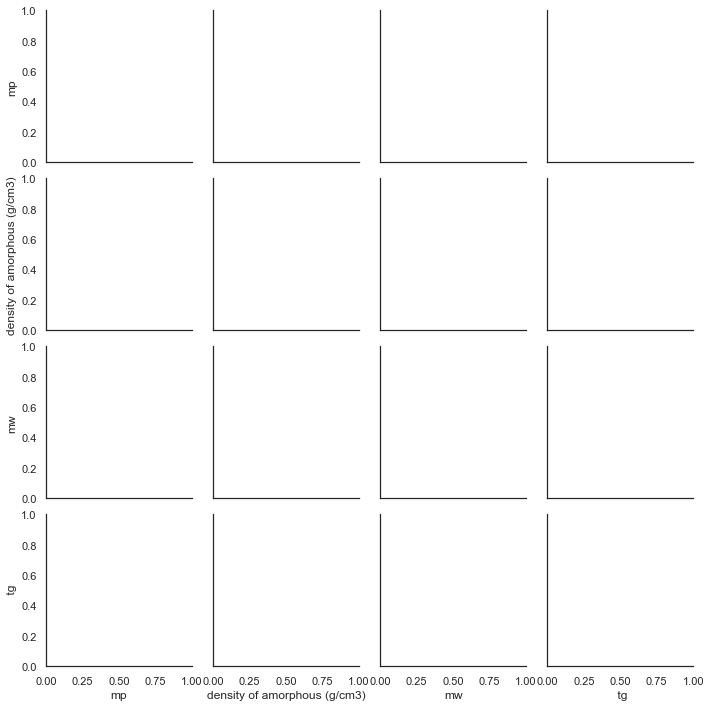

In [199]:
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(df_mip, columns=["mp", "density of amorphous (g/cm3)", "mw", " tg"])

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df_mip, vars = ["mp", "density of amorphous (g/cm3)", "mw", " tg"], hue="category", dropna=True)
g = g.map(sns.distplot, kde=True)
g.map_offdiag(corrfunc)
plt.show()

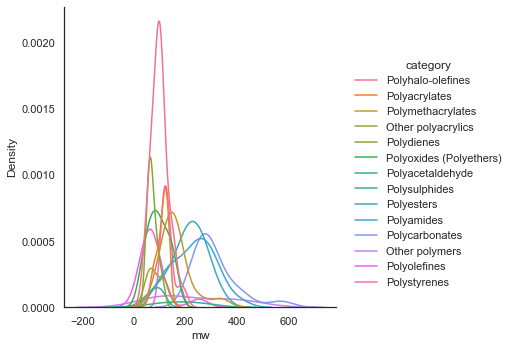

In [208]:
sns.displot(data=df_mip, x="mw", hue="category", kind="kde")

KeyError: 'Glass Transition(C)'

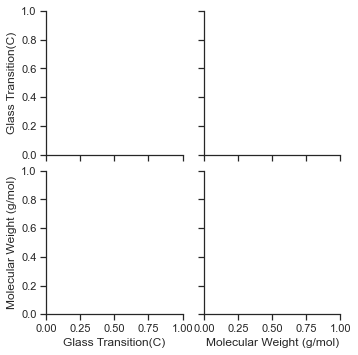

In [112]:
sns.set_style("ticks")
sns.pairplot(df_n, vars = ['Glass Transition(C)', "Molecular Weight (g/mol)"], hue = 'category',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [72]:
plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
                   cmap='viridis')
       plt.colorbar();  # show color scale

IndentationError: unexpected indent (2433444758.py, line 3)

TypeError: boxplot() got an unexpected keyword argument 'color'

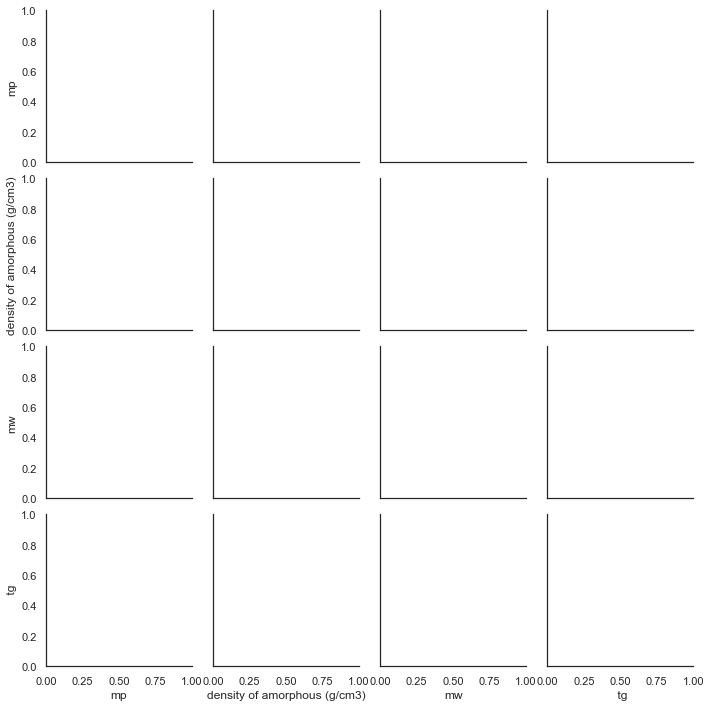

In [193]:
sns.set(style='white')
g = sns.PairGrid(df_n, vars = ["mp", "density of amorphous (g/cm3)", "mw", " tg"],
    hue = 'category')
g = g.map(plt.boxplot)
g.legend(loc='right', bbox_to_anchor=(1.5, 0.5), ncol=1)
plt.show()

Text(0, 0.5, 'Glass Transition Temperature (C)')

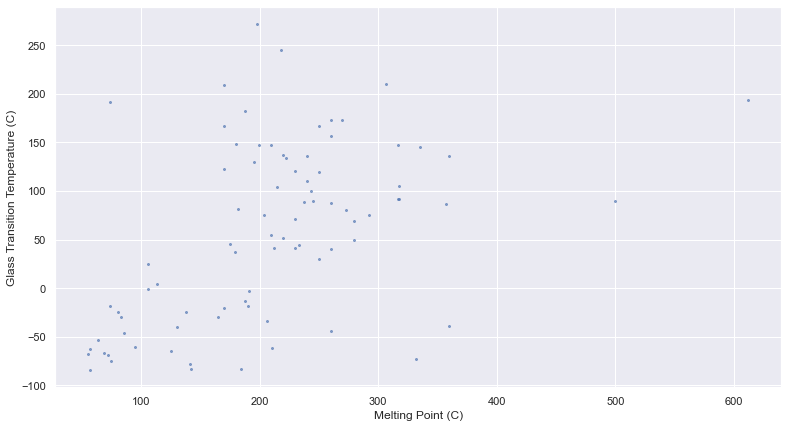

In [75]:
fig = plt.figure(figsize=(13,7))
plt.scatter(df_n['mp'], df_n[' tg'], s=4, cmap=df_n['category'],alpha= 1)
#plt.xlim(-14,-5)
#plt.ylim(-14,-5)
plt.xlabel('Melting Point (C)')
plt.ylabel('Glass Transition Temperature (C)')

KeyError: 'bright'

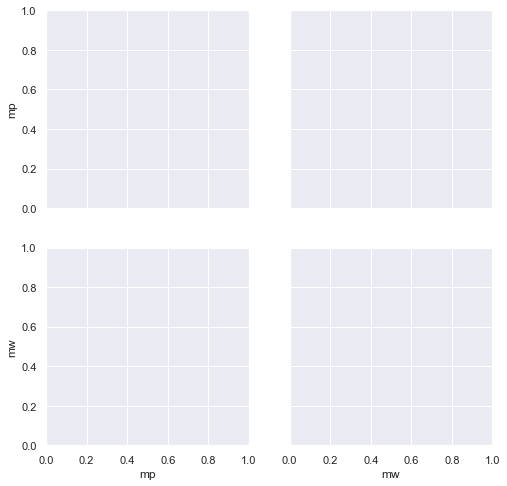

In [45]:
sns.pairplot(df_mp, vars = ['mp','mw'], diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, hue='bright',
            height = 4);

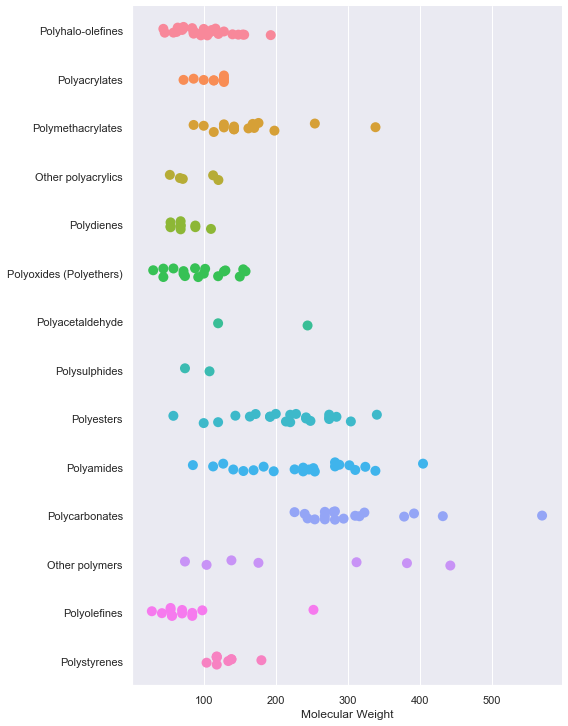

In [11]:
# Generate some category data
g = sns.catplot(x='mw', y='category', data = df_mip, height = 10, aspect = .8, s=10)
g.set_axis_labels("Molecular Weight", "")
plt.show()


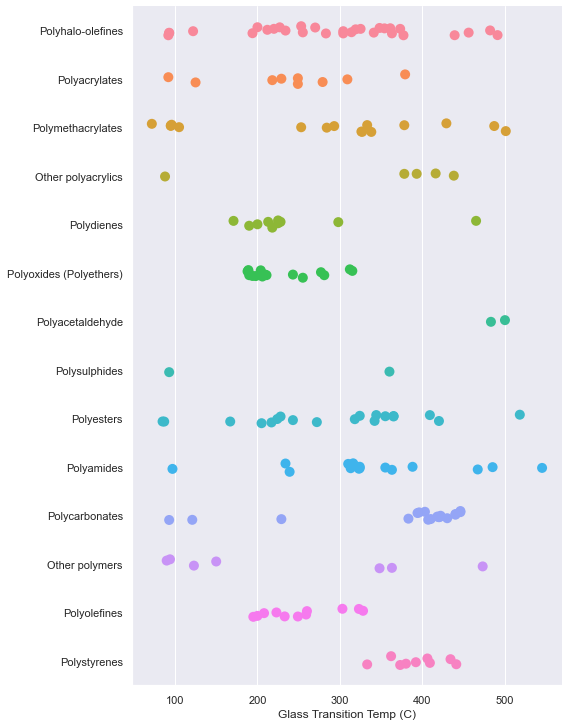

In [286]:
# Generate some category data
g = sns.catplot(x=' tg', y='category', data = df_mip, height = 10, aspect = .8, s=10)
g.set_axis_labels("Glass Transition Temp (C)", "")
plt.show()


/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/carlytravis/opt/anaconda3/envs/my_pymatgen/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

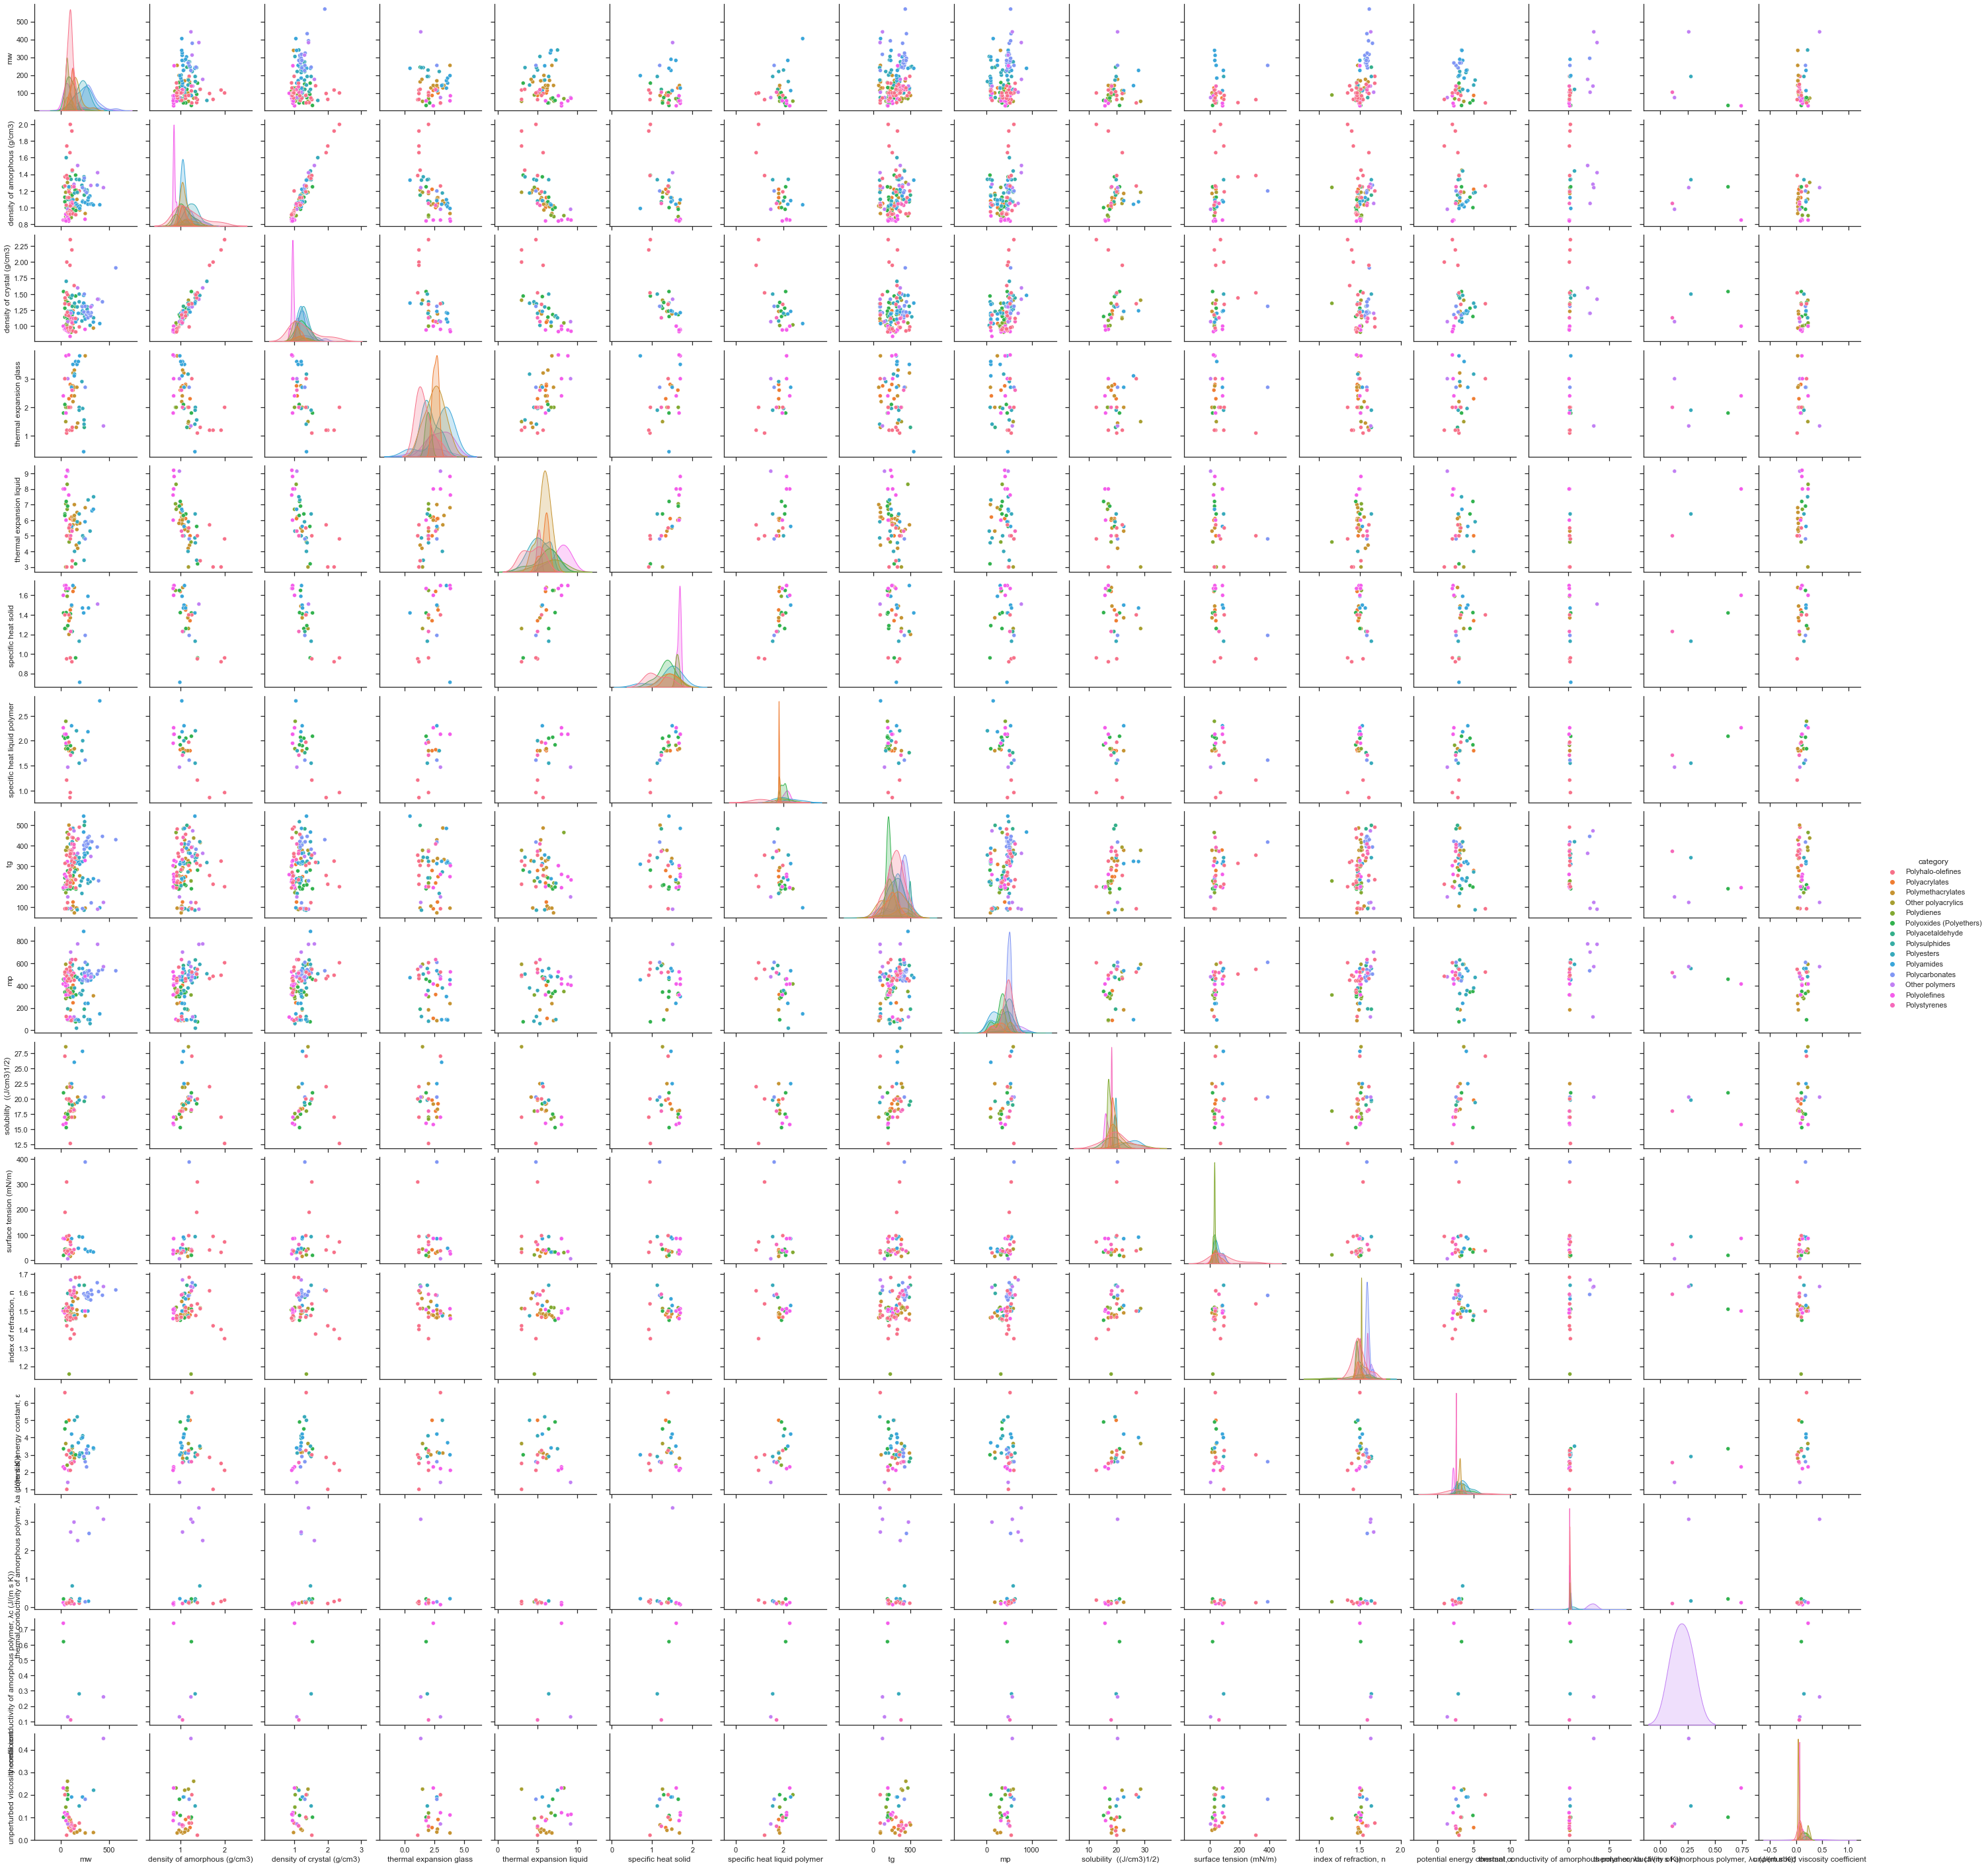

In [289]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df_mip, hue="category")

In [ ]:
sns.displot(data=df_n, x="mp", hue="category", kind="kde")

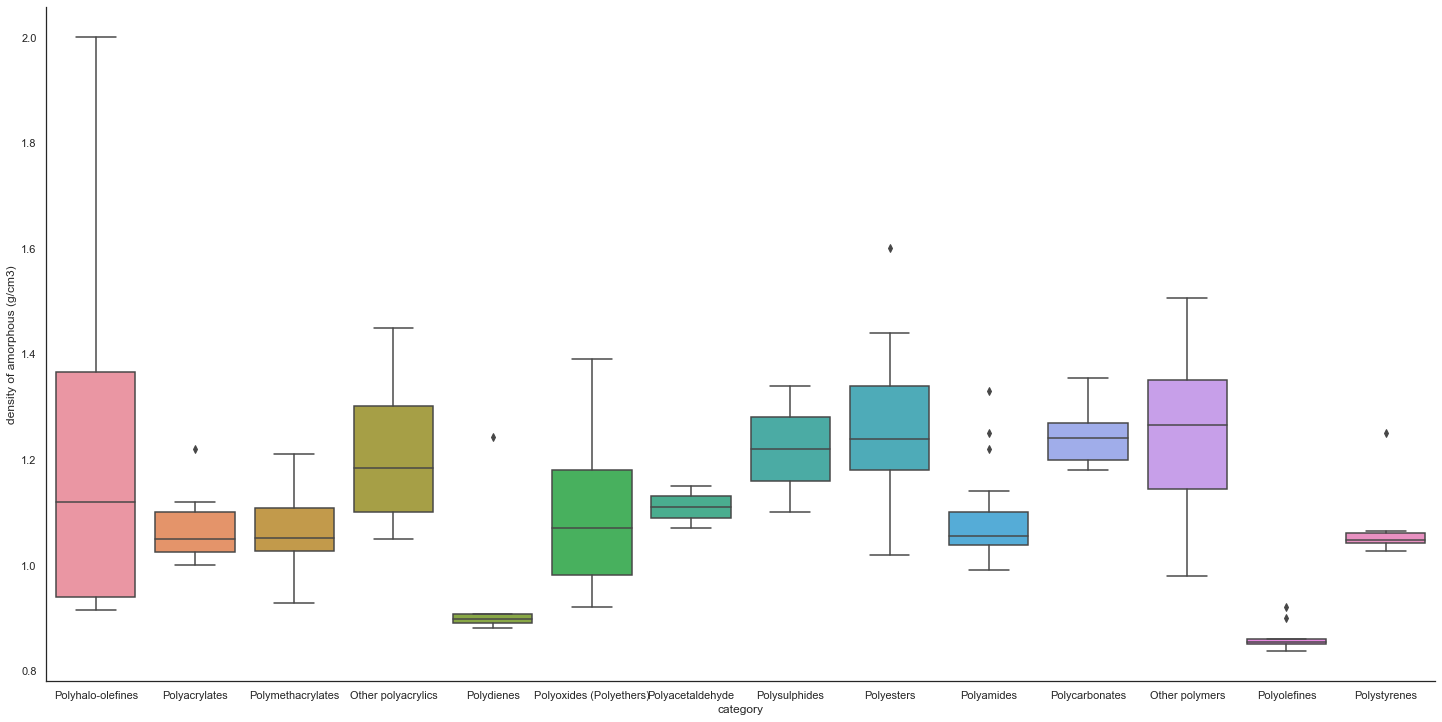

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
c = sns.catplot(x="category", y="density of amorphous (g/cm3)", kind="box", data=df_mip, height = 10, aspect = 2)
c.set_titles(col_template="category", fontweight='bold', fontsize=50)

# Merge on CAS Numbers

In [316]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')
Elements.keys()

Index(['AtomicNumber', 'Element', 'Symbol', 'AtomicMass', 'NumberofNeutrons',
       'NumberofProtons', 'NumberofElectrons', 'Period', 'Group', 'Phase',
       'Radioactive', 'Natural', 'Metal', 'Nonmetal', 'Metalloid', 'Type',
       'AtomicRadius', 'Electronegativity', 'FirstIonization', 'Density',
       'MeltingPoint', 'BoilingPoint', 'NumberOfIsotopes', 'Discoverer',
       'Year', 'SpecificHeat', 'NumberofShells', 'NumberofValence'],
      dtype='object')

In [282]:
cas_AM = df_AM['CAS Number']
cas_tg = df_glass['CAS']
cas_mon = df_mon['CAS']
cas_cas = df_cas['CAS']

In [274]:
df_mp.head()

,polymer,mp,mw
0,Poly( 3-bromo-decamethylene pyromelltimide) (i...,291.0,433.30
1,Poly( 3-methyl-hexamethylene adipamide) (diacid),216.0,240.35
2,Poly( 3-methyl-hexamethylene sebacamide) (diam...,153.0,296.46
3,Poly( tetramethyl-ethylene disiloxanylenedipro...,55.0,302.52
4,Poly( trans-1-methyl-2-propoxyethylene),168.0,100.16


In [277]:
df_mip.head()

,polymer,category,mw,density of amorphous (g/cm3),density of crystal (g/cm3),thermal expansion glass,thermal expansion liquid,specific heat solid,specific heat liquid polymer,"molar enthalpy of fusion, ΔHm (kJ/mol)",tg,mp,solubility ((J/cm3)1/2),surface tension (mN/m),"index of refraction, n","potential energy constant, ε","thermal conductivity of amorphous polymer, λa (J/(m s K))","thermal conductivity of amorphous polymer, λc (J/(m s K))",unperturbed viscosity coefficient
0,Poly(2-vinyl pyridine),Polyhalo-olefines,105.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-169.3,-58.3,NaN,NaN,NaN,NaN,NaN,NaN,0.082
1,Poly(vinyl pyrrolidone),Polyhalo-olefines,111.1,1.25,NaN,NaN,NaN,NaN,NaN,NaN,-453.3,NaN,NaN,NaN,1.530,NaN,NaN,NaN,0.074
2,Poly(vinyl carbazole),Polyhalo-olefines,193.2,1.20,0.988,NaN,NaN,NaN,NaN,NaN,-55.3,NaN,NaN,NaN,1.683,NaN,0.1405,NaN,0.074
3,Poly(acrylic acid),Polyacrylates,72.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-167.3,NaN,NaN,82.0,1.527,NaN,NaN,NaN,0.076
4,Poly(methyl acrylate),Polyacrylates,86.1,1.22,NaN,2.3,5.0,1.34,1.8,NaN,-267.3,NaN,19.8,41.0,1.479,5.0,NaN,NaN,0.054


In [278]:
df_AM.head()

,synonym,polymer,class,CID,CAS Number,SMILES,mp,tg,density,Structure-based name,Other name,Link
0,ABS,Acrylonitrile butadiene styrene,Polynitrile,24756.0,9003-56-9,C=CC=C.C=CC#N.C=CC1=CC=CC=C1,190,105.0,1.07,Poly(acrylonitrile-co-butadiene-co-styrene),NaN,https://polymerdatabase.com/Polymer%20Brands/A...
1,ASA,Acrylonitrile styrene acrylate,Polynitrile,44146374.0,80044-26-4,CC(=C)C(=O)OCCOC(=O)C1=CC=CC=C1OC(=O)C,180,112.0,1.07,2-(2-methylprop-2-enoyloxy)ethyl 2-acetyloxybe...,Luran,http://polymerdatabase.com/Polymer%20Brands/AS...
2,COP,Cyclo Olefin Polymer,Polyolefins,168460.0,26007-43-2,C=C.C\1=C\C2CC/1CC2,280,200.0,1.02,Ethylene Copolymer,NaN,http://polymerdatabase.com/polymer%20classes/C...
3,HIPS (PS),Polystyrene,Polystyrenes,7501.0,9003-53-6,C{-}C{n+}(c1ccccc1),180,107.0,1.05,"Poly(1-phenylethane-1,2-diyl)",Polyethenylbenzene,http://polymerdatabase.com/polymers/polystyren...
4,PA,Poly(caprolactam),Polyamide,32775.0,25038-54-4,N{-}CCCCCC{n+}(=O),220,70.0,1.08,"Poly[imino(1-oxohexane-1,6-diyl)]",Nylon 6,http://polymerdatabase.com/polymers/nylon6.html


In [ ]:
g = sns.catplot(x='mw', y='category', data = df, height = 10, aspect = .8, s=10)
g.set_axis_labels("Polymer Molecular Weight", "")
plt.show()

In [ ]:
#merge two sets
full_table = df_n.merge(
  right=df_g, 
  how='left',
  on=['polymer']
)
full_table.describe()

In [ ]:
#np.where(df_n['polymer'] == df_g['polymer'])

#df_glass[df_glass['polymer'].duplicated]
df_glass[df_glass.duplicated(['polymer'])]
#df['Diff'] = np.where( df['Score A'] == df['Score B'] , '1', '0')

In [ ]:
#Tg values, read string for easy manipulation
df_tg = pd.read_excel('glass_transition.xlsx',index_col=None, dtype={'Tg (K)': str})
df_tg = df_tg.dropna()
# https://pbpython.com/currency-cleanup.html
df_tg['Tg (K)'] = df_tg['Tg (K)'].str.replace('~','').str.replace('>','').astype('float')

#convert to celcius
df_tg['Tg (K)'] = df_tg['Tg (K)'] - 273.15

#Remove 50 > tg > 350 
df_tg = df_tg[df_tg['Tg (K)'] < 350] 
df_tg = df_tg[df_tg['Tg (K)'] > 0] 
df_tg.describe()

In [ ]:
#Rename polymer to match and average Tg values
df_tg = df_tg.rename(columns={'Polymer':'polymer','Tg (K)':'Tg'})
df_tg = df_tg.groupby('polymer')['Tg'].mean().reset_index()
df_tg.shape

In [ ]:
#check instances
print((df_n[df_n['polymer'].str.contains('Poly(methyl acrylate)')]))
print(df_tg[df_tg['polymer'].str.contains('Poly(methyl acrylate)')])

In [ ]:
#e.g.: 

# Always write the SMILES or IUPAC name inside quotes ''/"".

%python STOUT_V_2.1.py --smiles 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C' #SMILES to IUPAC
%python STOUT_V_2.1.py --iupac '1,3,7-trimethyl-2,3,6,7-tetrahydro-1H-purine-2,6-dione' #IUPAC to SMILES

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(mp, mw, fit_reg = False);

#density_plot.set_xlabel('Melting Point')
#density_plot.set_ylabel('Molecular Weight (g/mol)')
#density_plot.set_title('MP vs. MW')